In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
%%time
df = pd.read_parquet("df_optimized.parquet")

CPU times: user 11.9 s, sys: 5.03 s, total: 16.9 s
Wall time: 14.8 s


## Method Chaining
- 객체를 다시 할당할 필요 없이 효율적으로 다룸.

In [3]:
df.groupby("app_name").review_rating.agg(["size","mean"]).reset_index().sort_values("mean",ascending=False)

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_1077/2938149929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("app_name").review_rating.agg(["size","mean"]).reset_index().sort_values("mean",ascending=False)


,app_name,size,mean
1,FLIPKART_REVIEWS,8438195,4.322431
4,TIKTOK_REVIEWS,3465866,4.276736
3,SPOTIFY_REVIEWS,3377423,4.043836
6,WHATSAPP_REVIEWS,3605060,3.995535
2,INSTAGRAM_REVIEWS,3079939,3.931349
5,TWITTER_REVIEWS,2084851,3.835051
0,FACEBOOK_REVIEWS,4103051,3.169134


## groupby iteration

In [4]:
for app_name, group in df.groupby("app_name"):
    review_first = group.review_timestamp.min().strftime('%Y-%m')
    review_last = group.review_timestamp.max().strftime('%Y-%m')
    print(f"{app_name} : {review_first} ~ {review_last}")

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_1077/2170354591.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for app_name, group in df.groupby("app_name"):


FACEBOOK_REVIEWS : 2009-09 ~ 2023-11
FLIPKART_REVIEWS : 2011-07 ~ 2023-11
INSTAGRAM_REVIEWS : 2022-01 ~ 2023-11
SPOTIFY_REVIEWS : 2014-05 ~ 2023-11
TIKTOK_REVIEWS : 2020-08 ~ 2023-11
TWITTER_REVIEWS : 2010-05 ~ 2023-11
WHATSAPP_REVIEWS : 2021-11 ~ 2023-11


## nlargest vs sort_values

In [5]:
%%time
## top likes
df.review_likes.nlargest()
# 리뷰 중에서 가장 많이 좋아요가 눌린 횟수

CPU times: user 162 ms, sys: 96.8 ms, total: 259 ms
Wall time: 260 ms


2909470    225178
3490987    155782
1420363    153522
6493767    138051
5567532    121053
Name: review_likes, dtype: Int32

In [6]:
%%time
## top likes
df.review_likes.sort_values(ascending=False).head(5)

CPU times: user 562 ms, sys: 148 ms, total: 709 ms
Wall time: 709 ms


2909470    225178
3490987    155782
1420363    153522
6493767    138051
5567532    121053
Name: review_likes, dtype: Int32

## vectorize

CPU times: user 17.1 s, sys: 903 ms, total: 18 s
Wall time: 18.3 s


<Axes: xlabel='review_timestamp'>

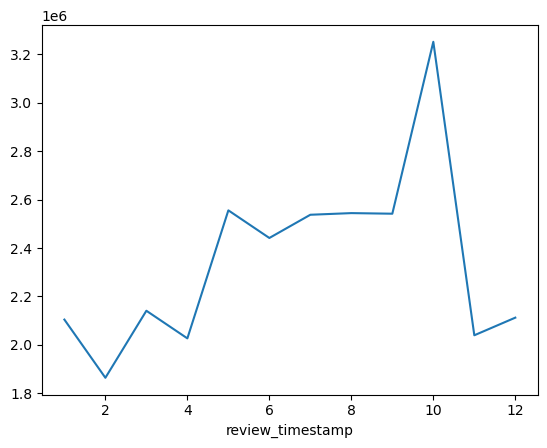

In [7]:
%%time
df.review_timestamp.apply(lambda x: x.month).value_counts().sort_index().plot()
# 연도와 일자 정보를 무시하고 월별로 리뷰가 몇 개씩 달리는지 봄.

CPU times: user 850 ms, sys: 25 ms, total: 875 ms
Wall time: 470 ms


<Axes: xlabel='review_timestamp'>

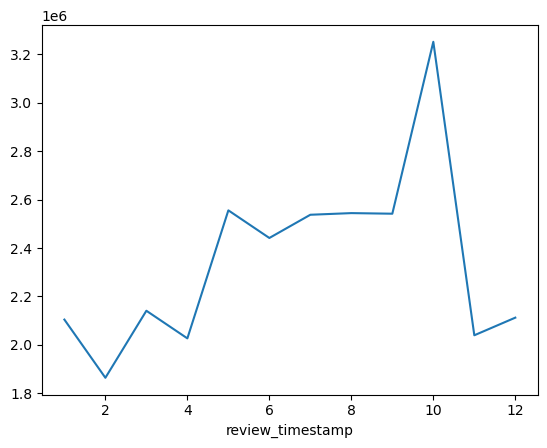

In [8]:
%%time
df.review_timestamp.dt.month.value_counts().sort_index().plot()

CPU times: user 1.07 s, sys: 58.3 ms, total: 1.13 s
Wall time: 702 ms


<Axes: xlabel='review_timestamp'>

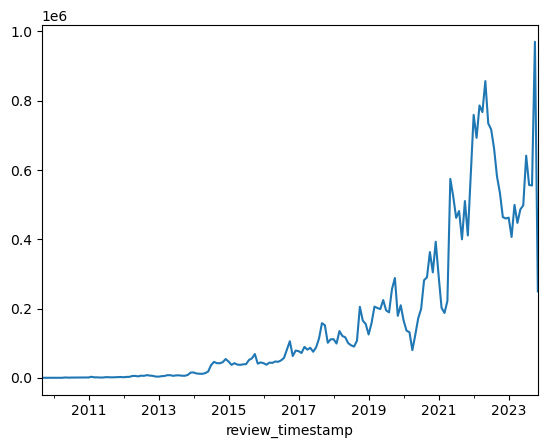

In [9]:
%%time
df.review_timestamp.dt.to_period('M').value_counts().sort_index().plot()
# month 단위로 데이터를 바꿈

CPU times: user 53.3 s, sys: 878 ms, total: 54.2 s
Wall time: 53.7 s


<Axes: xlabel='review_timestamp'>

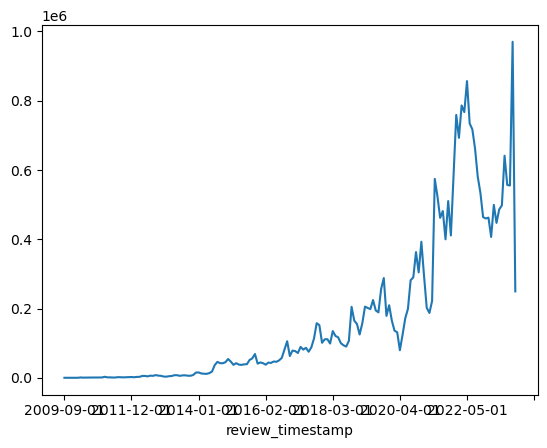

In [10]:
%%time
df.review_timestamp.apply(lambda x: x.strftime('%Y-%m-01')).value_counts().sort_index().plot()
# 문자열이 들어가면 연산 속도도 무척 느리다.

## 월별 평가 집계

In [11]:
df

,review_id,app_name,author_name,pseudo_author_id,author_app_version,review_rating,review_likes,review_timestamp
0,ff27dd54-d785-418f-998c-8c2e01351201,WHATSAPP_REVIEWS,VI*******AR,232289234882626103787,2.21.23.23,5,0,2021-11-25 08:12:29
1,08e30530-c0fe-4a94-86d3-cc2ddb08b66b,WHATSAPP_REVIEWS,Ha************an,165667818870073259663,2.21.10.16,5,0,2021-11-25 08:12:37
2,f6077a17-bcc3-4445-b23e-15d292f217b9,WHATSAPP_REVIEWS,Ar******77,235241404052650920045,2.21.21.19,1,0,2021-11-25 08:12:55
3,6ac91332-f85e-488f-8538-3d50f803f22b,WHATSAPP_REVIEWS,Na************* U,217415827699074437622,2.21.10.16,5,0,2021-11-25 08:12:59
4,8eaf12b4-386e-4ca3-a5b4-6dd45e051b54,WHATSAPP_REVIEWS,or*****************ne,326804115988587106741,2.21.22.26,5,0,2021-11-25 08:12:59
...,...,...,...,...,...,...,...,...
28154380,eb08e7b6-6add-41b7-97a2-a7e5053300ea,TIKTOK_REVIEWS,Ga*********iz,560112522554086626083,32.0.4,5,0,2023-11-15 01:38:14
28154381,d110bc83-aa62-4951-88c9-364e19d4d522,TIKTOK_REVIEWS,Sa*****an,203447945877029912209,32.1.5,3,0,2023-11-15 01:38:18
28154382,e7de841c-6af6-470e-a93e-e7c7865b7b20,TIKTOK_REVIEWS,D****n,990580573246917748627,NaN,5,0,2023-11-15 01:38:20
28154383,6e2cd7b8-f21c-476d-a041-08f9de8e0c38,TIKTOK_REVIEWS,Jo***ne,107829512185085443674,32.1.5,4,0,2023-11-15 01:38:41


In [12]:
# 월별 정보를 미리줘서 groupby가 쉬워지도록
df = df.assign(review_timestamp_month = df.review_timestamp.dt.to_period('M'))

In [13]:
# 안 좋은 코드
# df.reset_index(inplace=True)
# df['review_timestamp_month'] = df.review_timestamp.dt.to_period('M')

In [14]:
for idx, num in enumerate(range(100,105)):
    print(idx,num)

0 100
1 101
2 102
3 103
4 104


/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_1077/3686531750.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for idx, (app_name,group) in enumerate(df.groupby("app_name")):


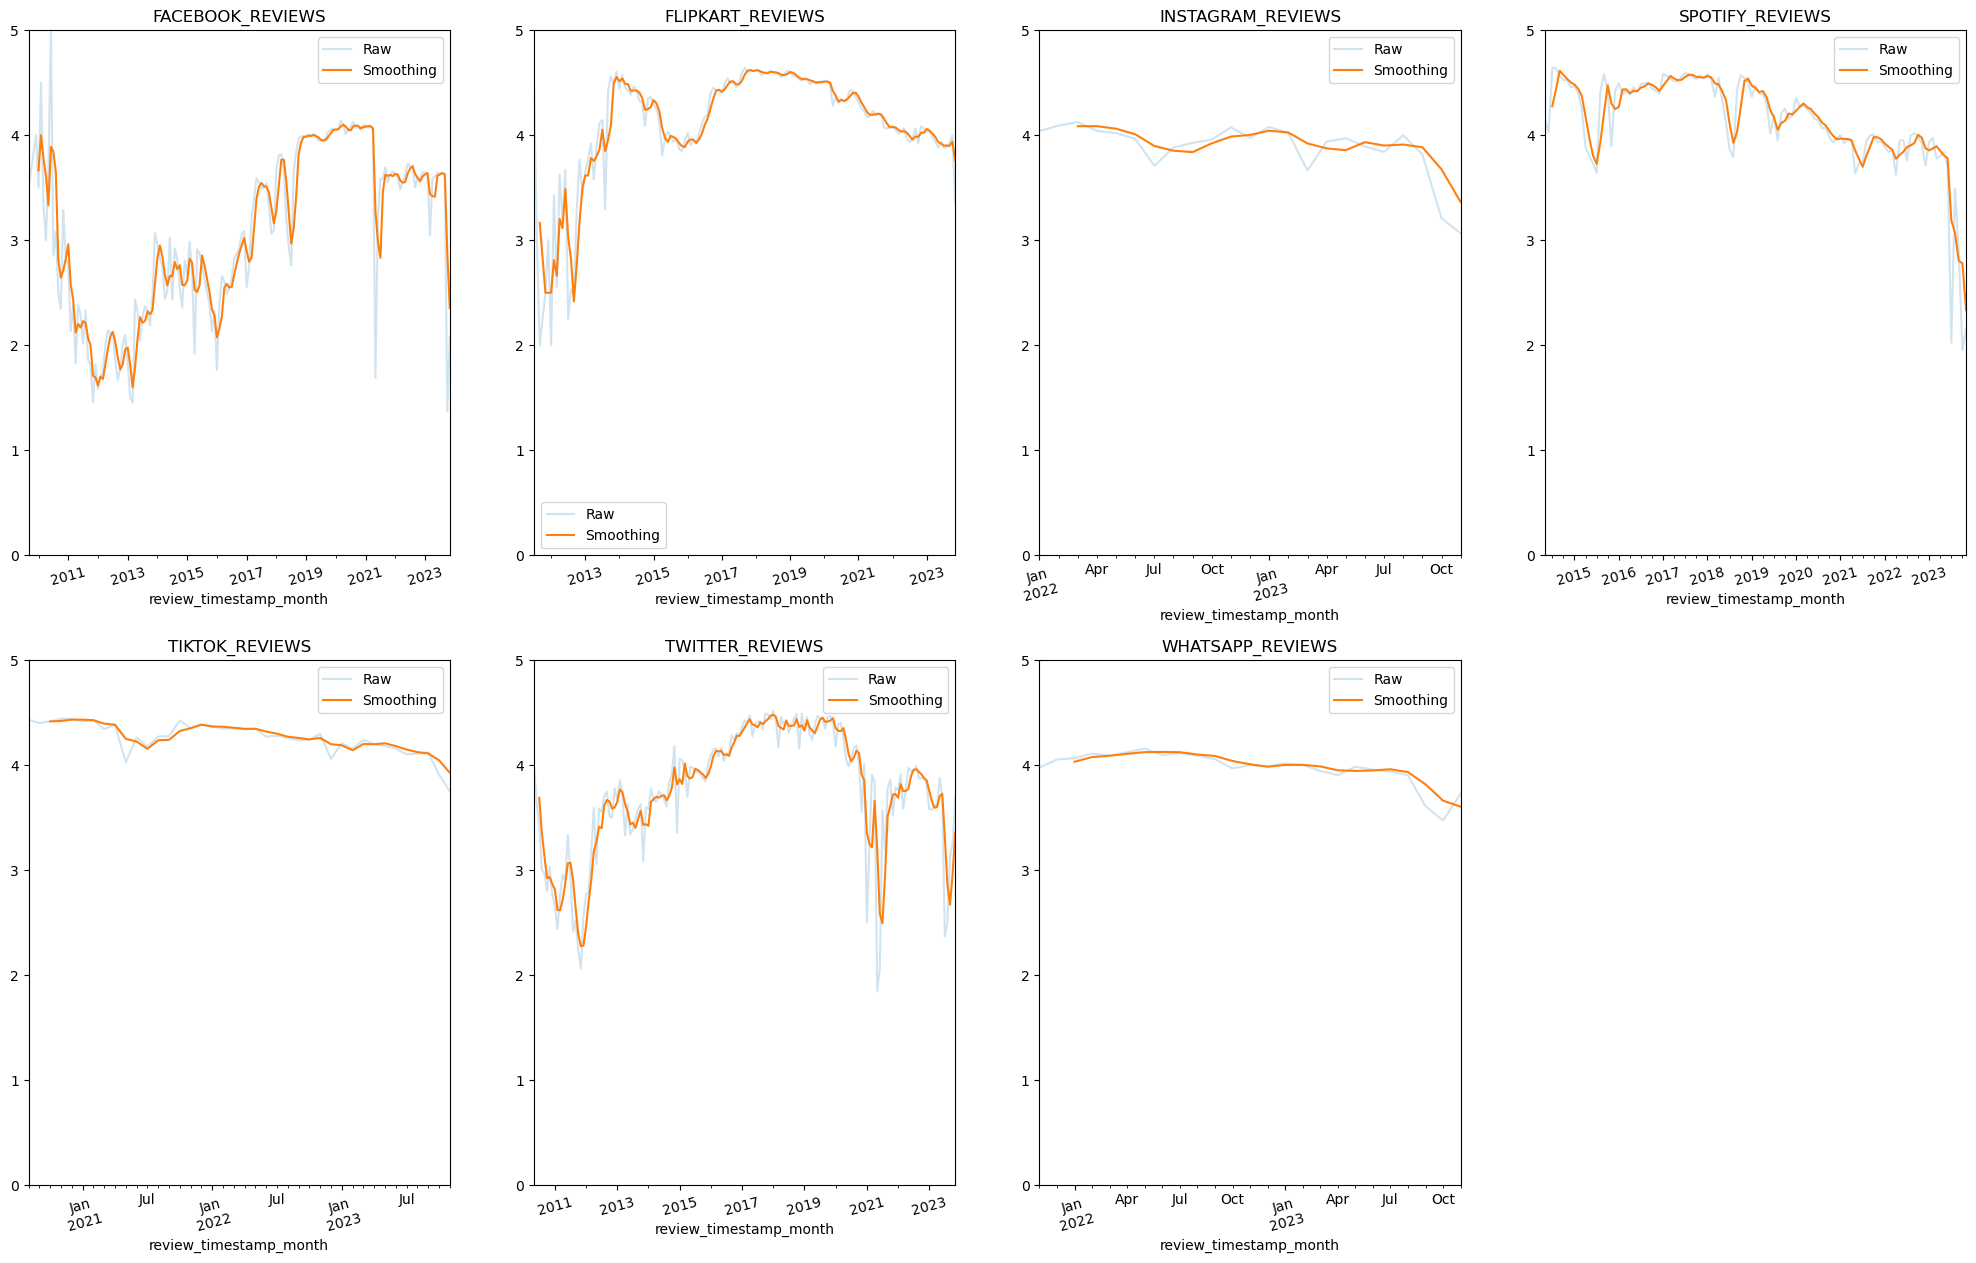

In [15]:
plt.figure(figsize=(25,15))
for idx, (app_name,group) in enumerate(df.groupby("app_name")):
    monthly_rating = group.groupby("review_timestamp_month").review_rating.mean()
    plt.subplot(2,4, idx+1)
    monthly_rating.plot(alpha=0.2)
    monthly_rating.rolling(3).mean().plot()
    plt.title(app_name)
    plt.legend(['Raw','Smoothing'])
    plt.xticks(rotation=15)
    plt.ylim(0,5)
plt.show()
# rolling은 이동평균

## 트렌드를 감지해보자
- 앱 평점이 상승 추세인지 하강 추세인지 감별하고 싶을 때. 이를 위해 주식에서 많이 사용하는 골든 / 데드 크로스를 사용하기로 함.
- 일 단위로 평균 rating 집계
- 리뷰가 5개 이하인 일자는 제외 (조금 있음)
- 20일자의 이평선이, 60일자의 이평선을 뚫고 내려가거나(데드크로스), 돌파하여 올라갈 때(골든 크로스)를 감지한다.
- 이평선 : 이동평균. 최근의 추세가 장기적인 추세보다 앞서있냐 떨어졌냐

In [16]:
df = df.assign(review_timestamp_day = df.review_timestamp.dt.date)

In [17]:
df_daily = df.groupby(["app_name", "review_timestamp_day"]).review_rating.agg(['size','mean'])
df_daily.head()

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_1077/3289268664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_daily = df.groupby(["app_name", "review_timestamp_day"]).review_rating.agg(['size','mean'])


size  mean
app_name         review_timestamp_day            
FACEBOOK_REVIEWS 2009-09-09               1   4.0
                 2009-09-18               1   3.0
                 2009-12-17               2   4.0
                 2010-01-28               1   4.0
                 2010-01-29               1   3.0

In [18]:
df_daily.nsmallest(3,"size")
# app_name이 카테고리로 되어있음.
# 모든 날짜에 대해서 timestamp_day가 다 7이다.

size  mean
app_name         review_timestamp_day            
FACEBOOK_REVIEWS 2010-05-01               0  <NA>
                 2010-05-02               0  <NA>
                 2010-05-04               0  <NA>

In [19]:
df_daily = df_daily.rename(columns={'size':'review_count','mean':'review_mean'}).reset_index()
df_daily.head()

,app_name,review_timestamp_day,review_count,review_mean
0,FACEBOOK_REVIEWS,2009-09-09,1,4.0
1,FACEBOOK_REVIEWS,2009-09-18,1,3.0
2,FACEBOOK_REVIEWS,2009-12-17,2,4.0
3,FACEBOOK_REVIEWS,2010-01-28,1,4.0
4,FACEBOOK_REVIEWS,2010-01-29,1,3.0


In [20]:
df_daily = df_daily[df_daily['review_count'] != 0]

In [21]:
filter_count = (df_daily['review_count'] <= 5).sum()
if filter_count > 0 :
    filter_ratio = filter_count / len(df_daily)
    print(f"{filter_count}개 row droped")
    df_daily = df_daily[df_daily['review_count'] > 5]

705개 row droped


In [22]:
df_daily = df_daily.sort_values(['app_name','review_timestamp_day'])

## 안 좋은 코드

In [23]:
df_daily_facebook = df_daily[df_daily.app_name == 'FACEBOOK_REVIEWS']

In [24]:
df_daily_facebook = df_daily_facebook.reset_index()

In [25]:
%%time
# 안 좋은 코드
trends = []
ma_longs = []
ma_shorts = []
for i in range(1,len(df_daily_facebook)+1):
    if i < 61:
        trends.append(None)
        continue
    ma_long = df_daily_facebook.review_mean.iloc[i-60:i].mean()
    ma_short = df_daily_facebook.review_mean.iloc[i-20:i].mean()
    if ma_short > ma_long:
        trend = 'Up'
    elif ma_short < ma_long:
        trend = 'Down'
    else:
        trend = "Neutral"
    trends.append(trend)
    
    ma_longs.append(ma_long)
    ma_shorts.append(ma_short)

CPU times: user 161 ms, sys: 1.28 ms, total: 162 ms
Wall time: 161 ms


In [26]:
%%time
ma_long = df_daily_facebook.review_mean.rolling(60).mean()
ma_short = df_daily_facebook.review_mean.rolling(20).mean()

trend = np.where(ma_short == ma_long,'Neutral',np.where(ma_short > ma_long,'Up','Down'))
trend[:60] = None

CPU times: user 706 µs, sys: 532 µs, total: 1.24 ms
Wall time: 832 µs


In [27]:
df_daily_facebook = df_daily_facebook.assign(trend_np=trend)
df_daily_facebook = df_daily_facebook.assign(trend = trends)

In [28]:
df_daily_facebook[df_daily_facebook['trend'] != df_daily_facebook['trend_np']]

,index,app_name,review_timestamp_day,review_count,review_mean,trend_np,trend
0,242,FACEBOOK_REVIEWS,2010-12-15,7,2.285714,None,None
1,283,FACEBOOK_REVIEWS,2011-01-25,7,2.285714,None,None
2,286,FACEBOOK_REVIEWS,2011-01-28,11,3.0,None,None
3,287,FACEBOOK_REVIEWS,2011-01-29,6,4.0,None,None
4,289,FACEBOOK_REVIEWS,2011-01-31,7,3.714286,None,None
5,298,FACEBOOK_REVIEWS,2011-02-09,6,2.666667,None,None
6,300,FACEBOOK_REVIEWS,2011-02-11,6,2.666667,None,None
7,333,FACEBOOK_REVIEWS,2011-03-16,9,2.222222,None,None
8,334,FACEBOOK_REVIEWS,2011-03-17,11,2.090909,None,None
9,348,FACEBOOK_REVIEWS,2011-03-31,8,2.625,None,None


In [29]:
df_daily_facebook.trend.values[0]

In [30]:
df_daily_facebook.trend_np.values[0]

'None'

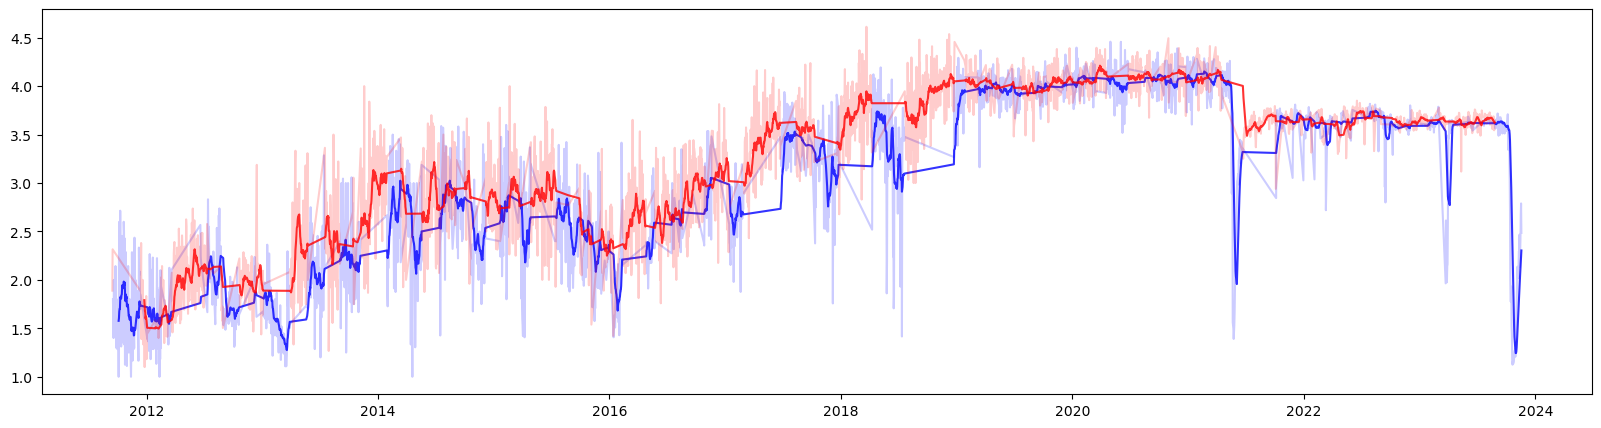

In [31]:
plt.figure(figsize=(20,5))
color_map = {'Up':'Red','Down':'Blue','Neutral':'Grey'}
for trend,group in df_daily_facebook.groupby('trend'):
    color = color_map[trend]
    plt.plot(group.review_timestamp_day,group.review_mean, color=color,alpha=0.2)
    plt.plot(group.review_timestamp_day,group.review_mean.rolling(14).mean(),color = color,alpha=0.8)

    
plt.show()

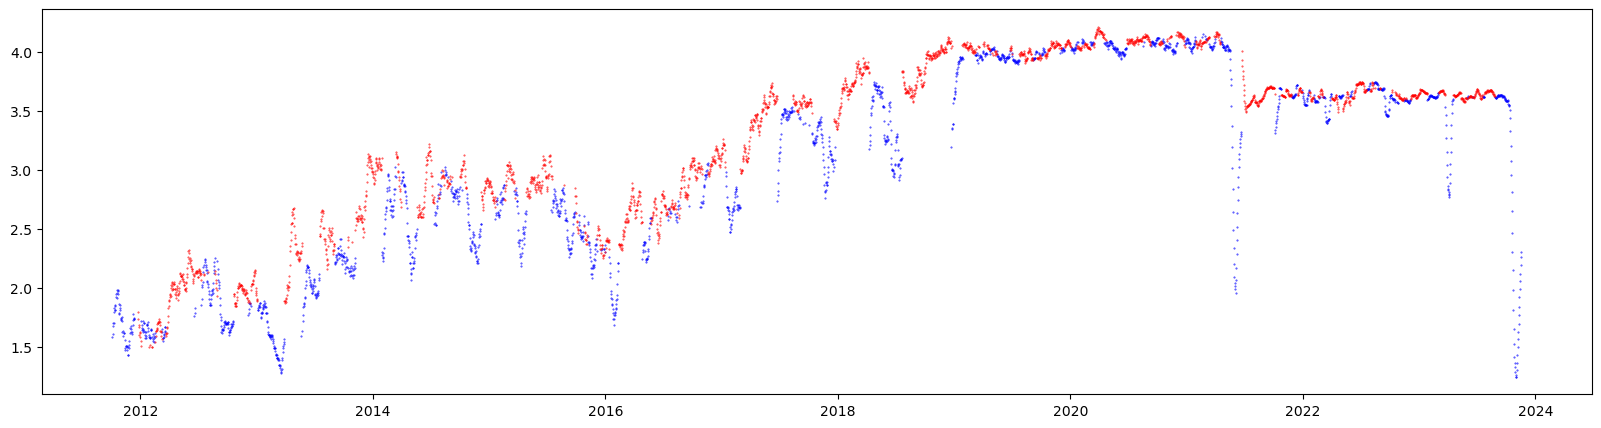

In [32]:
plt.figure(figsize=(20,5))
color_map = {'Up':'Red','Down':'Blue','Neutral':'Grey'}
for trend,group in df_daily_facebook.groupby('trend'):
    color = color_map[trend]
    plt.scatter(group.review_timestamp_day,group.review_mean.rolling(14).mean(),color = color,alpha=0.8,s=0.2)

    
plt.show()

## 함수화와 검증

In [33]:
def trend_calculator(df_target):
    df_target = df_target.reset_index(drop=True)
    ma_long = df_target.review_mean.rolling(60).mean()
    ma_short = df_target.review_mean.rolling(20).mean()
    trend = np.where(ma_short == ma_long,'Neutral',np.where(ma_short > ma_long,'Up','Down'))
    df_target - df_target.assign(trend = trend)
    df_target.loc[df_target.index < 60, 'trend'] = None
    return df_target

In [35]:
df_daily_facebook2 = df_daily[df_daily.app_name == "FACEBOOK_REVIEWS"]
df_daily_facebook2 = trend_calculator(df_daily_facebook2)

TypeError: unsupported operand type(s) for -: 'Categorical' and 'Categorical'

In [36]:
from pandas.testing import assert_frame_equal

column_to_check = ["review_timestamp_day", "review_mean", "trend"]
assert_frame_equal(df_daily_facebook[column_to_check], df_daily_facebook2[column_to_check])

KeyError: "['trend'] not in index"

**Multiprocessing**

In [37]:
list_df_target_trend = []
for app_name, df_target in df_daily.groupby("app_name"):
    df_target_trend = trend_calculator(df_target)
    list_df_target_trend.append(df_target_trend)

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_1077/3460846116.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for app_name, df_target in df_daily.groupby("app_name"):


TypeError: unsupported operand type(s) for -: 'Categorical' and 'Categorical'

In [38]:
%%time
df_agg = pd.concat([trend_calculator(df_target) for app_name, df_target in df_daily.groupby("app_name")])

<timed exec>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


TypeError: unsupported operand type(s) for -: 'Categorical' and 'Categorical'

In [39]:
%%time
from joblib import Parallel, delayed
df_agg = pd.concat(Parallel(n_jobs=-1)(delayed(trend_calculator)(df_target) for app_name, df_target in df_daily.groupby("app_name")))

<timed exec>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas

TypeError: unsupported operand type(s) for -: 'Categorical' and 'Categorical'

### Entropy
- 자료가 얼마나 퍼져있는 가를 나타냄.

$$
    \sum_i^n{- i * log(p(i)}
$$

In [40]:
def get_entropy(group):
    entropy = sum([-rate * np.log(ratio) for rate, ratio in group.review_rating.value_counts(normalize=True).items()])
    return entropy

In [41]:
%%time
ser_entropy = pd.Series({app_name:get_entropy(group) for app_name, group in df.groupby("app_name")})

<timed exec>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


CPU times: user 1.49 s, sys: 1.14 s, total: 2.64 s
Wall time: 3.04 s


In [42]:
ser_entropy

FACEBOOK_REVIEWS     31.455511
FLIPKART_REVIEWS     28.376202
INSTAGRAM_REVIEWS    29.376620
SPOTIFY_REVIEWS      28.390700
TIKTOK_REVIEWS       32.137737
TWITTER_REVIEWS      27.621901
WHATSAPP_REVIEWS     27.886915
dtype: float64

In [43]:
import seaborn as sns

In [44]:
df_review_rating_by_app = df.groupby(["app_name", "review_rating"]).size().dropna().reset_index(name="size")

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_1077/2885728950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_review_rating_by_app = df.groupby(["app_name", "review_rating"]).size().dropna().reset_index(name="size")


In [45]:
df_review_rating_by_app_target = df_review_rating_by_app[df_review_rating_by_app.app_name.isin(["FACEBOOK_REVIEWS", "WHATSAPP_REVIEWS"])]
df_review_rating_by_app_target

,app_name,review_rating,size
0,FACEBOOK_REVIEWS,0,34
1,FACEBOOK_REVIEWS,1,1586200
2,FACEBOOK_REVIEWS,2,173821
3,FACEBOOK_REVIEWS,3,200048
4,FACEBOOK_REVIEWS,4,245606
5,FACEBOOK_REVIEWS,5,1897342
36,WHATSAPP_REVIEWS,0,0
37,WHATSAPP_REVIEWS,1,583629
38,WHATSAPP_REVIEWS,2,157868
39,WHATSAPP_REVIEWS,3,225677


In [46]:
df_review_rating_by_app_target.loc[:, "app_name"] = df_review_rating_by_app_target.app_name.cat.remove_unused_categories()

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_1077/3510314115.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['FACEBOOK_REVIEWS', 'FACEBOOK_REVIEWS', 'FACEBOOK_REVIEWS', 'FACEBOOK_REVIEWS', 'FACEBOOK_REVIEWS', ..., 'WHATSAPP_REVIEWS', 'WHATSAPP_REVIEWS', 'WHATSAPP_REVIEWS', 'WHATSAPP_REVIEWS', 'WHATSAPP_REVIEWS']
Length: 12
Categories (2, object): ['FACEBOOK_REVIEWS', 'WHATSAPP_REVIEWS']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_review_rating_by_app_target.loc[:, "app_name"] = df_review_rating_by_app_target.app_name.cat.remove_unused_categories()


<Axes: xlabel='review_rating', ylabel='size'>

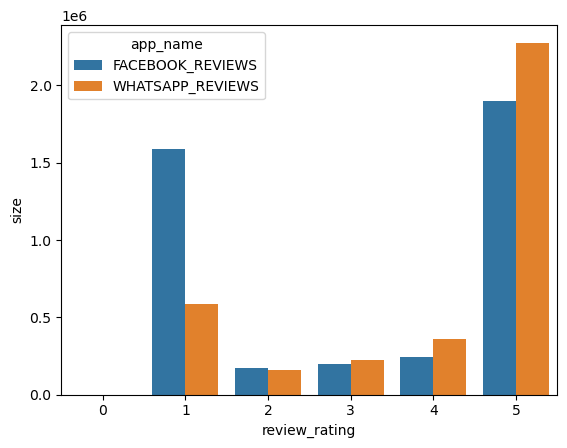

In [47]:
sns.barplot(x="review_rating", y="size", hue="app_name", data = df_review_rating_by_app_target)